## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca
import os

In [2]:
features = []
remote_folder = 'Gel_studies' #Folder in AWS S3 containing files to be analyzed
bucket = 'dtoghani.data'
vids = 10
mws = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Deff2',
          'Mean Mean_Intensity', 'Std Mean_Intensity',
          'X', 'Y', 'Mean X', 'Mean Y', 'Std X', 'Std Y']
calcs = [2]

counter = 0
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            try:
                filename = 'features_{}_{}mM_XY{}.csv'.format(mw, calc, '%02d' % num)
                # os.remove(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[mw], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                #fstats['Calcium Concentration'] = pd.Series(fstats.shape[0]*[str(calcs)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skip filename: {}'.format(filename))

features_10k_PEG_2mM_XY01.csv
features_10k_PEG_2mM_XY02.csv
features_10k_PEG_2mM_XY03.csv
features_10k_PEG_2mM_XY04.csv
features_10k_PEG_2mM_XY05.csv
features_10k_PEG_2mM_XY06.csv
features_10k_PEG_2mM_XY07.csv
features_10k_PEG_2mM_XY08.csv
features_10k_PEG_2mM_XY09.csv
features_10k_PEG_2mM_XY10.csv
features_5k_PEG_2mM_XY01.csv
features_5k_PEG_2mM_XY02.csv
features_5k_PEG_2mM_XY03.csv
features_5k_PEG_2mM_XY04.csv
features_5k_PEG_2mM_XY05.csv
features_5k_PEG_2mM_XY06.csv
features_5k_PEG_2mM_XY07.csv
features_5k_PEG_2mM_XY08.csv
features_5k_PEG_2mM_XY09.csv
features_5k_PEG_2mM_XY10.csv
features_1k_PEG_2mM_XY01.csv
features_1k_PEG_2mM_XY02.csv
features_1k_PEG_2mM_XY03.csv
features_1k_PEG_2mM_XY04.csv
features_1k_PEG_2mM_XY05.csv
features_1k_PEG_2mM_XY06.csv
features_1k_PEG_2mM_XY07.csv
features_1k_PEG_2mM_XY08.csv
features_1k_PEG_2mM_XY09.csv
features_1k_PEG_2mM_XY10.csv
features_PS_COOH_2mM_XY01.csv
features_PS_COOH_2mM_XY02.csv
features_PS_COOH_2mM_XY03.csv
features_PS_COOH_2mM_XY04.csv


In [ ]:
fstats_new.to_csv('features.csv')

In [3]:
fstats_tot.shape

(2117105, 69)

In [4]:
for mw in mws:
    print(fstats_tot[fstats_tot['Particle Type'] == mw].shape)

(491385, 69)
(496469, 69)
(425071, 69)
(704180, 69)


In [5]:
##fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_totMW = fstats_sub[fstats_sub['Particle Type'].isin(['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH'])].reset_index(drop=True)
#nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Calcium Concentration', 'Deff2']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [32]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [33]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [34]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [13]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-0.74714637 -0.64021989 -0.5164112 ]


In [16]:
means

[-0.36967134371154486,
 -0.8477339164699549,
 -0.6592979839393279,
 -0.6218912278797473]

In [28]:
types = ['PS_COOH', '1k_PEG', '5k_PEG', '10k_PEG']

In [17]:
types = ['1k_PEG', '5k_PEG', '10k_PEG', 'PS_COOH']

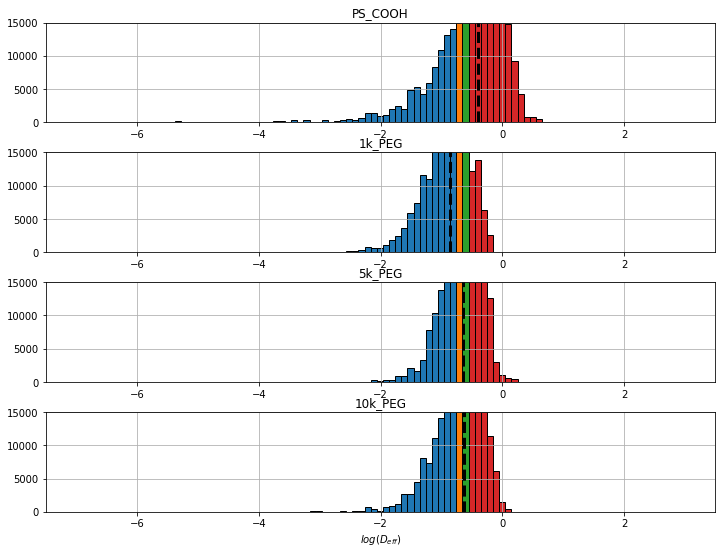

In [29]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.747, -0.640, -0.5164, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Particle Type']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

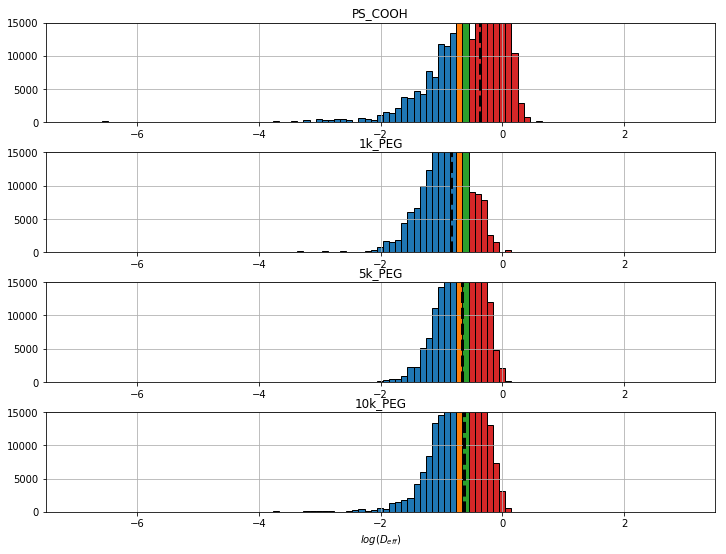

In [30]:
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [64]:
newmap = cm.viridis(np.linspace(0.0, 0.9, 4))
labels3 = ['PS-COOH', 'PS-PEG(10k)', 'PS-PEG(5k)', 'PS-PEG(1k)']
types = ['PS_COOH', '10k_PEG', '5k_PEG', '1k_PEG']

In [65]:
newmap[0:3, :] = cm.viridis(np.linspace(0.0, 0.9, 4))[0:3, :][::-1, :]
#newmap[:, :] = newmap[::-1, :]

In [49]:
newmap

array([[ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.741388,  0.873449,  0.149561,  1.      ],
       [ 0.134692,  0.658636,  0.517649,  1.      ],
       [ 0.206756,  0.371758,  0.553117,  1.      ]])

In [46]:
newmap[::-1, :]

array([[ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.741388,  0.873449,  0.149561,  1.      ],
       [ 0.134692,  0.658636,  0.517649,  1.      ],
       [ 0.206756,  0.371758,  0.553117,  1.      ]])

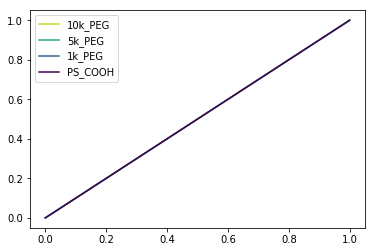

In [16]:
for i, mw in enumerate(mws):
    plt.plot([0,1], [0,1], c=newmap[3-i], label=mws[i])
    plt.legend()

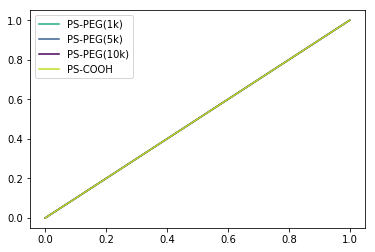

In [66]:
for i, mw in enumerate(types):
    plt.plot([0,1], [0,1], c=newmap[i], label=labels3[3-i])
    plt.legend()

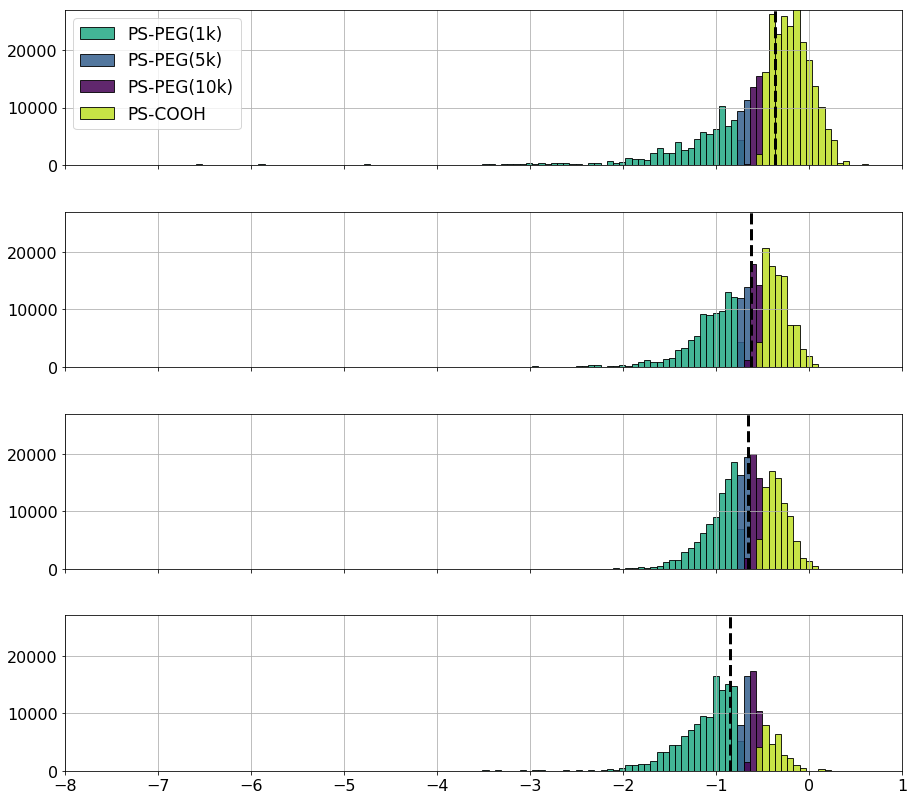

In [68]:
from matplotlib.pyplot import cm
Dbins = [-10, -0.747, -0.640, -0.5164, 10]
bins = np.linspace(-10, 10, 300)
fig, axes = plt.subplots(nrows=4, figsize=(15, 14))
counter = 0
means = []
#labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Particle Type']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(15,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-8, 1])
        ax.set_ylim([0, 27000])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Particle Type']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    if counter == 0:
        ax.legend(fontsize=17)
    #ax.set_yticklabels([])
#     if counter == 3:
#         ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/mw_hist.png', dpi=300, pad_inches=0.1)

In [20]:
from sklearn.metrics import classification_report

In [23]:
types_order = ['PS_COOH', 'PS_NH2', '5k_PEG_NH2', '5k_PEG']
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -0.747, -0.640, -0.5164, 10], labels=types).astype(str))
y_true2 = X_train['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

    10k_PEG     0.2825    0.1448    0.1914    244724
     1k_PEG     0.3271    0.6181    0.4278    211851
     5k_PEG     0.3216    0.1333    0.1885    246757
    PS_COOH     0.5112    0.6197    0.5602    352129
        nan     0.0000    0.0000    0.0000         0

avg / total     0.3769    0.3955    0.3612   1055461



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [24]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -0.747, -0.640, -0.5164, 10], labels=types).astype(str))
y_true2 = X_test['Particle Type'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

    10k_PEG     0.2570    0.1351    0.1771    246658
     1k_PEG     0.3248    0.6066    0.4231    213210
     5k_PEG     0.3344    0.1435    0.2008    249710
    PS_COOH     0.5168    0.6256    0.5660    352051
        nan     0.0000    0.0000    0.0000         0

avg / total     0.3750    0.3944    0.3610   1061629



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [3]:
ncomp = 14
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.18458239060224252
1 component: 0.31146489252009035
2 component: 0.4134637324274216
3 component: 0.4870203173090337
4 component: 0.5414389290613226
5 component: 0.5863118820588492
6 component: 0.6254933620906442
7 component: 0.6604598658537583
8 component: 0.6913278471224511
9 component: 0.720618708339028
10 component: 0.7452153987229034
11 component: 0.7669490166970687
12 component: 0.7871093462744946
13 component: 0.8052905811573173


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

In [6]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [7]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Std Deff1,Mean boundedness,asymmetry3,Mean asymmetry1,Mean frames,Std asymmetry2,trappedness,frames,Std SN_Ratio,Deff1,Std boundedness,Std alpha,Std MSD_ratio,Std SN_Ratio
1,Mean Deff1,Mean trappedness,asymmetry2,Mean asymmetry2,Mean straightness,Std asymmetry1,boundedness,straightness,Std efficiency,D_fit,Std trappedness,Mean alpha,Mean MSD_ratio,SN_Ratio
2,Mean Quality,Mean Deff2,elongation,Std asymmetry1,Std frames,Mean efficiency,MSD_ratio,trappedness,Mean SN_Ratio,kurtosis,Std SN_Ratio,Std MSD_ratio,Mean_Intensity,Mean_Intensity
3,Mean D_fit,Std fractal_dim,asymmetry1,Mean efficiency,Std efficiency,trappedness,alpha,boundedness,Mean_Intensity,alpha,Std MSD_ratio,Std efficiency,Std alpha,Std Quality
4,Mean asymmetry3,Std trappedness,fractal_dim,Std asymmetry2,Mean efficiency,boundedness,D_fit,efficiency,Mean efficiency,fractal_dim,Mean MSD_ratio,Mean MSD_ratio,Mean alpha,Mean SN_Ratio


In [8]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Mean alpha', 'Std alpha',
       'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object')

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [5]:
import numpy as np
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='10k_PEG'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='5k_PEG'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='1k_PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Particle Type']=='PS_COOH'].values[:, -ncomp:], axis=0)

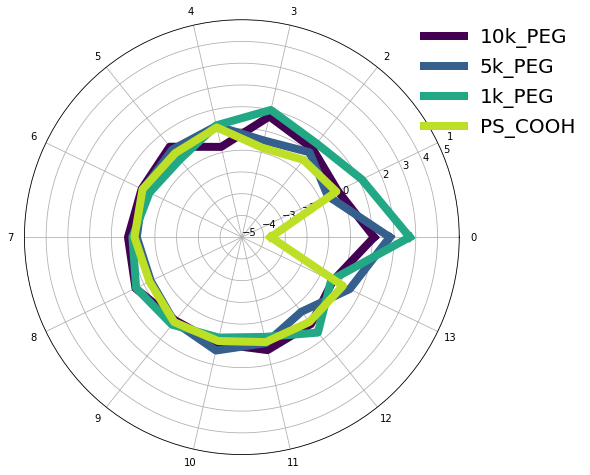

In [10]:
labels = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 5, 11))

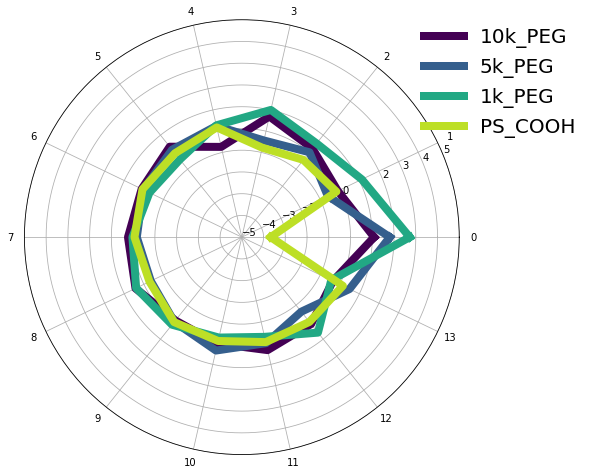

In [6]:
labels = ['10k_PEG', '5k_PEG', '1k_PEG', 'PS_COOH']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-5, 5, 11))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

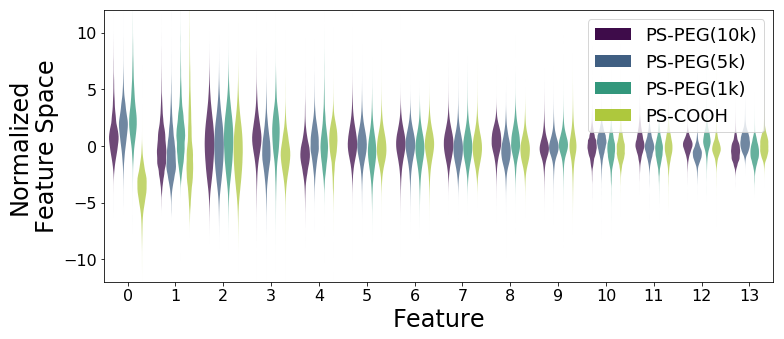

In [8]:
labels = mws
labels2 = ['PS-PEG(10k)', 'PS-PEG(5k)', 'PS-PEG(1k)', 'PS-COOH']
feats = feature_violin(pcadataset.final, label='Particle Type', lvals=labels, labels=labels2, fsubset=14, yrange=[-12, 12],
                       legendfontsize=21, labelsize=24, fname='./pics/mw_pcadist.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

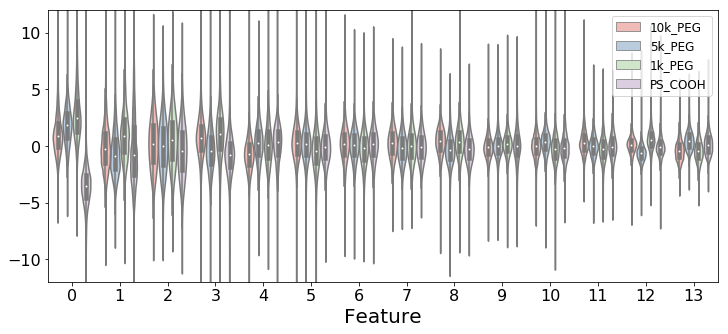

In [11]:
feats = pca.feature_violin(pcadataset.final, label='Particle Type', lvals=labels, fsubset=ncomp, yrange=[-12, 12])

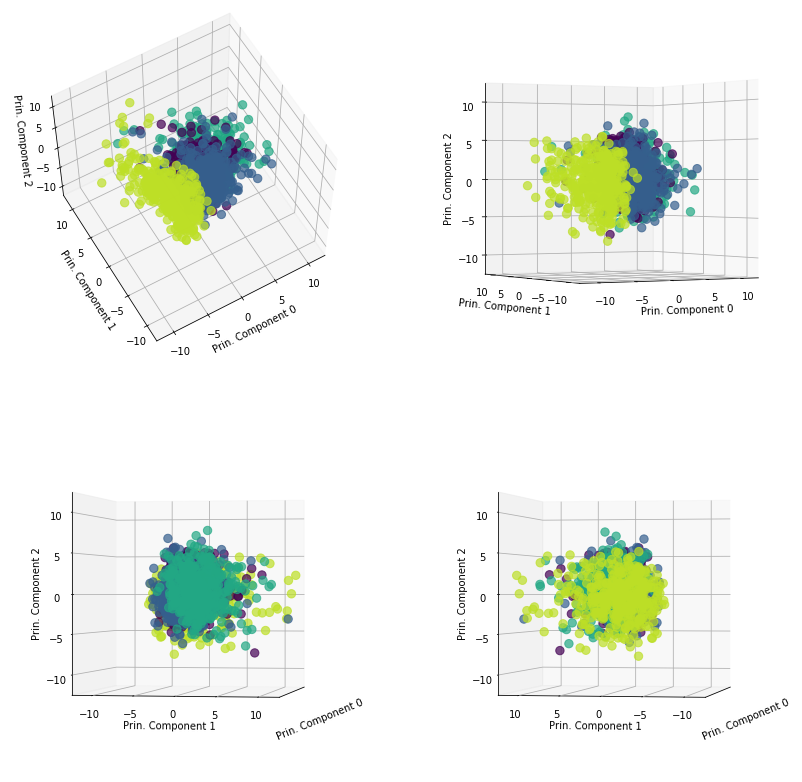

In [12]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 1, 2])

## Neural Network

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [14]:
featofvar = 'Particle Type'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.22069237
Validation score: 0.926260
Iteration 2, loss = 0.17774498
Validation score: 0.936761
Iteration 3, loss = 0.15188072
Validation score: 0.951026
Iteration 4, loss = 0.13086172
Validation score: 0.960308
Iteration 5, loss = 0.11415233
Validation score: 0.961189
Iteration 6, loss = 0.10193385
Validation score: 0.963929
Iteration 7, loss = 0.09322980
Validation score: 0.972037
Iteration 8, loss = 0.08642470
Validation score: 0.976958
Iteration 9, loss = 0.08221268
Validation score: 0.978965
Iteration 10, loss = 0.07819289
Validation score: 0.977194
Iteration 11, loss = 0.07575092
Validation score: 0.978658
Iteration 12, loss = 0.07329557
Validation score: 0.983295
Iteration 13, loss = 0.07122186
Validation score: 0.984531
Iteration 14, loss = 0.06993541
Validation score: 0.983814
Iteration 15, loss = 0.06834649
Validation score: 0.983460
Iteration 16, loss = 0.06720449
Validation score: 0.985720
Iteration 17, loss = 0.06591790
Validation score: 0.987223
Iterat

MemoryError: 

In [17]:
print('Training Results')
y_true1, y_pred1 = y_train, clf.predict(X_train)
print(classification_report(y_true1, y_pred1, digits=4))

print('Test Results')
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred, digits=4))

Training Results
             precision    recall  f1-score   support

    10k_PEG     0.9949    0.9944    0.9947    294813
     1k_PEG     0.9922    0.9966    0.9944    255344
     5k_PEG     0.9973    0.9942    0.9958    297665
    PS_COOH     0.9999    0.9998    0.9999    422441

avg / total     0.9966    0.9966    0.9966   1270263

Test Results

             precision    recall  f1-score   support

    10k_PEG     0.9929    0.9925    0.9927    196572
     1k_PEG     0.9903    0.9951    0.9927    169727
     5k_PEG     0.9962    0.9925    0.9944    198804
    PS_COOH     0.9999    0.9998    0.9999    281739

avg / total     0.9955    0.9955    0.9955    846842



In [15]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['X'] < 1024].values[:, -ncomp:]
X_test = pcadataset.final[pcadataset.final['X'] > 1024].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['X'] < 1024][featofvar].values
y_test = pcadataset.final[pcadataset.final['X'] > 1024][featofvar].values


for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.20966752
Validation score: 0.935206
Iteration 2, loss = 0.14705163
Validation score: 0.956713
Iteration 3, loss = 0.10996066
Validation score: 0.968448
Iteration 4, loss = 0.08502507
Validation score: 0.976111
Iteration 5, loss = 0.06882732
Validation score: 0.985322
Iteration 6, loss = 0.05831463
Validation score: 0.984180
Iteration 7, loss = 0.05174023
Validation score: 0.985937
Iteration 8, loss = 0.04690352
Validation score: 0.991130
Iteration 9, loss = 0.04352792
Validation score: 0.992326
Iteration 10, loss = 0.04108654
Validation score: 0.993314
Iteration 11, loss = 0.03806638
Validation score: 0.992557
Iteration 12, loss = 0.03639489
Validation score: 0.992568
Iteration 13, loss = 0.03570192
Validation score: 0.990679
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.02546390
Validation score: 0.996992
Iteration 15, loss = 0.02452917
Validation score: 0.996553
Iterat

In [21]:
featofvar = 'Particle Type'
X_train = pcadataset.final[(pcadataset.final['X'] < 512) | (pcadataset.final['X'].between(1024, 1536))].values[:, -ncomp:]
X_test = pcadataset.final[(pcadataset.final['X'].between(512, 1024)) | (pcadataset.final['X'] > 1536)].values[:, -ncomp:]
y_train = pcadataset.final[(pcadataset.final['X'] < 512) | (pcadataset.final['X'].between(1024, 1536))][featofvar].values
y_test = pcadataset.final[(pcadataset.final['X'].between(512, 1024)) | (pcadataset.final['X'] > 1536)][featofvar].values


for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.19682931
Validation score: 0.936273
Iteration 2, loss = 0.13099496
Validation score: 0.964213
Iteration 3, loss = 0.09634929
Validation score: 0.972457
Iteration 4, loss = 0.07565114
Validation score: 0.979966
Iteration 5, loss = 0.06255651
Validation score: 0.988329
Iteration 6, loss = 0.05432569
Validation score: 0.986442
Iteration 7, loss = 0.04882074
Validation score: 0.990534
Iteration 8, loss = 0.04437797
Validation score: 0.988309
Iteration 9, loss = 0.04140906
Validation score: 0.992263
Iteration 10, loss = 0.03896464
Validation score: 0.993574
Iteration 11, loss = 0.03739458
Validation score: 0.992521
Iteration 12, loss = 0.03613307
Validation score: 0.992580
Iteration 13, loss = 0.03524312
Validation score: 0.994150
Iteration 14, loss = 0.03394553
Validation score: 0.993415
Iteration 15, loss = 0.03293345
Validation score: 0.994915
Iteration 16, loss = 0.03258833
Validation score: 0.994994
Iteration 17, loss = 0.03198454
Validation score: 0.995054
Iterat

Text(0,0.5,'Validation Scores')

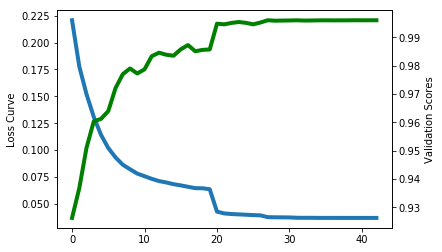

In [18]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

## Alternate binning

In [5]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [6]:
featofvar = 'Particle Type'

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.20704399
Validation score: 0.938757
Iteration 2, loss = 0.14104760
Validation score: 0.957355
Iteration 3, loss = 0.10260649
Validation score: 0.972884
Iteration 4, loss = 0.07792286
Validation score: 0.980416
Iteration 5, loss = 0.06274590
Validation score: 0.984168
Iteration 6, loss = 0.05383711
Validation score: 0.986783
Iteration 7, loss = 0.04842205
Validation score: 0.987503
Iteration 8, loss = 0.04458619
Validation score: 0.991454
Iteration 9, loss = 0.04089397
Validation score: 0.991994
Iteration 10, loss = 0.03932210
Validation score: 0.989692
Iteration 11, loss = 0.03746976
Validation score: 0.993709
Iteration 12, loss = 0.03628953
Validation score: 0.992231
Iteration 13, loss = 0.03557423
Validation score: 0.994088
Iteration 14, loss = 0.03454327
Validation score: 0.992875
Iteration 15, loss = 0.03400036
Validation score: 0.995405
Iteration 16, loss = 0.03345037
Validation score: 0.994410
Iteration 17, loss = 0.03260692
Validation score: 0.995509
Iterat